In [44]:
import pandas as pd
from os.path import exists

### Importing the Data (as URL taken from NGA database)

In [37]:
verified_la = pd.read_csv('../../data_samples/results/whole_set_results/downloaded_LaArt.csv')

In [38]:
#verified_la.directory = '../' + verified_la.directory

In [39]:
#check = verified_la.directory + verified_la.subfolder + '/' + verified_la.file_name

In [53]:
#verified_la['image_fp'] = check

In [45]:
#path_exists = check.apply(lambda x: exists(x))

In [56]:
#verified_la['file_downloaded'] = path_exists

In [58]:
#verified_la.to_csv('../../data_samples/results/whole_set_results/downloaded_LaArt.csv', index=False)

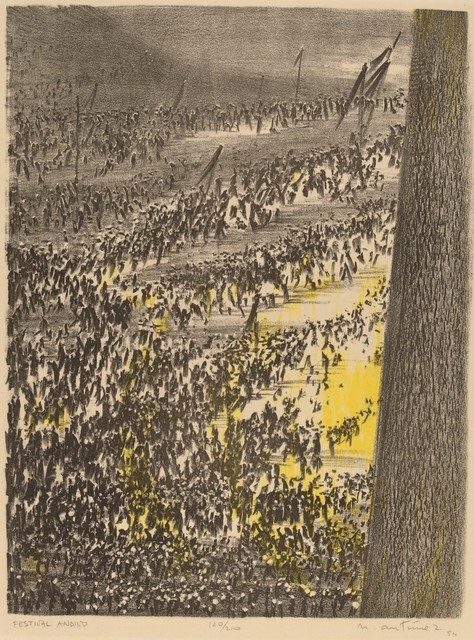

In [33]:
from IPython.display import Image
Image(filename='../../latinamerican-2-imagefolder-split/train/Festival_Andino_Antunez_46741.jpg')

In [2]:
#pa_latin_art = pd.read_csv('./data_samples/pa_latin_art.csv')

In [3]:
#pa_latin_art.drop(columns=['created', 'modified', 'iiifthumburl', 'iiifurl', 'artistofngaobject', 'beginyear', 'endyear', 'visualbrowsertimespan', 'visualbrowsernationality', 'Demonym', 'visualbrowserclassification', 'visualbrowsertimespan.1', 'displaydate.1', 'beginyear.1', 'endyear.1', 'objectid.1', 'volume', 'watermarks', 'subclassification', 'accessionnum', 'customprinturl', 'lastdetectedmodification'], inplace=True)

In [4]:
#pa_latin_art = pa_latin_art[['expanded_url', 'title','forwarddisplayname', 'medium', 'displaydate', 'viewtype', 'sequence', 'width', 'height','maxpixels',
                             #'depictstmsobjectid', 'assistivetext', 'objectid', 'displayorder',
                             #'roletype', 'role', 'constituentid', 'ulanid', 'preferreddisplayname', 'lastname', 'nationality',
                             #'constituenttype', 'Percent_in_NGA', 'Country', 'Continent',
                             #'Country Name', 'accessioned', 'locationid',
                             #'dimensions', 'inscription', 'markings', 'attributioninverted',
                             #'attribution', 'provenancetext', 'creditline', 'classification',
                             #'parentid', 'isvirtual', 'departmentabbr', 'portfolio', 'series']]

In [5]:
#pa_latin_art

### Scraping Images from Open Source NGA Database

In [6]:
#import shutil
#import requests
#def download_image(url, file_name, headers):
#    response = requests.get(url, headers=headers)
#    if response.status_code == 200:
#        with open(file_name, "wb") as f:
#            f.write(response.content)
#        shutil.move(file_name,'./All_Images/' + file_name)
#    else:
#        print(response.status_code)

In [7]:
 # Define HTTP Headers
#headers = {
#    "User-Agent": "Chrome/51.0.2704.103",
#}
#import time
#for i in range(197, len(pa_latin_art)):
#    #Define URL of an image
#    url = pa_latin_art.expanded_url[i]
#    # Define image file name
#    file_name = str.replace(str.replace(pa_latin_art.title[i], ' ', '_'), '/', '&') + '_' + str.replace(pa_latin_art.lastname[i], ' ', '_').replace('/', '&') + str(int(pa_latin_art.objectid[i])) + '.jpg'
#    # Download image
#    #timer delay (15 seconds)
#    time.sleep(15)
#    download_image(url, file_name, headers)

In [8]:
#pa_latin_art['file_name'] = pd.concat([pa_latin_art[:197].title.apply(lambda x: x.replace(' ', '_') + '.jpg'), pa_latin_art[197:].title.apply(lambda x: x.replace(' ', '_').replace('/', '&')) + '_' + pa_latin_art[197:].lastname.apply(lambda x: x + '.jpg')])

In [9]:
#pa_latin_art.to_csv('./data_samples/pa_latin_art.csv', index=False)

### Verifying File Names Correspond to the Dataset (Some Images Unable to be Downloaded)

In [10]:
#pa_latin_art.drop(columns=['departmentabbr', 'locationid', 'role', 'roletype', 'viewtype'], inplace=True)
#pa_latin_art['directory'] = ['./All_Images'] * len(pa_latin_art)
#pa_latin_art.to_csv('./data_samples/pa_latin_art.csv', index=False)

In [11]:
pa_latin_art = pd.read_csv('../data_samples/pa_latin_art.csv')

In [12]:
#checking that the filepath / naming conventions I used are consistent
#from os.path import exists
#file_exists = []
#for i in range(len(pa_latin_art)):
#    directory = pa_latin_art.directory[i]
#    filename = pa_latin_art.file_name[i]
#    full = directory + '/' + filename
#    file_exists.append(exists(full))

In [13]:
#pa_latin_art['file_downloaded'] = file_exists

In [14]:
#pa_latin_art.to_csv('./data_samples/pa_latin_art.csv', index=False)

In [15]:
stored_latin_art = pa_latin_art.where(pa_latin_art.file_downloaded == True).dropna(how='all')
stored_latin_art.reset_index(drop = True, inplace=True)

### Using Pre-Trained ResNet Classification Model for Initial Insights

In [17]:
#from torchvision.models import resnet50, ResNet50_Weights
#from PIL import Image

In [18]:
#Step 1: Creating the Model
#weights = ResNet50_Weights.DEFAULT
#model = resnet50(weights=weights)
#model.eval()
##Step 2: Preprocessing Step for Inference (transforming the images)
#preprocess = weights.transforms()

In [19]:
##Step 3: Apply previous step to all Images (To speed up the process, could use a dataloader to feed the images)
#ResNet50_Accuracy = []
#ResNet50_Prediction = []
#for i in range(len(stored_latin_art)):
#    img = Image.open(stored_latin_art.directory[i] + '/' + stored_latin_art.file_name[i])
#    batch = preprocess(img).unsqueeze(0)
#    prediction = model(batch).squeeze(0).softmax(0)
#    # Step 4: Use the model and print the predicted category
#    class_id = prediction.argmax().item()
#    score = prediction[class_id].item()
#    category_name = weights.meta["categories"][class_id]
#    ResNet50_Accuracy.append(100 * score)
#    ResNet50_Prediction.append(category_name)

In [20]:
#predictions = pd.DataFrame({'Image Accuracy - ResNet V2 (%)': ResNet50_Accuracy, 'Image Prediction - ResNet V2': ResNet50_Prediction})

In [21]:
#predictions = pd.concat([predictions, stored_latin_art.loc[:, ['title', 'forwarddisplayname']]], axis = 1)

In [22]:
#predictions.sort_values(by='Image Accuracy - ResNet V2 (%)', ascending=False)

In [23]:
#predictions.to_csv('./data_samples/results/image_predictions_resnetv2.csv', index=False)

In [24]:
predictions = pd.read_csv('../data_samples/results/image_predictions_resnetv2.csv')

In [25]:
predictions.loc[:, 'Image Accuracy - ResNet V2 (%)'].describe()

count    328.000000
mean      16.238882
std       11.398615
min        2.167588
25%        7.772030
50%       13.693587
75%       19.781394
max       60.189790
Name: Image Accuracy - ResNet V2 (%), dtype: float64

In [26]:
import numpy as np

In [27]:
np.median(predictions.loc[:, 'Image Accuracy - ResNet V2 (%)'])

13.693586736917496

## Outcome
Given the description above of the predictions using ResNet (A state of the art image classification algorithm) many of the objects which it predicted as belonging to the image have a very low score / accuracy. 50% of all the predictions have an accuracy in the range of ~8% to ~20%. 25% belong to the larger range of 20% to 60%, and the last 25% in the smaller and much worse range of ~2% to ~8%. This shows me that the predictions' distributions are shifted to the left and is tapered/skewed to the right-tail thus it is positively skewed and the mean>median, showing that larger scores are outliers.

I think the reason the model is doing badly in its classification of an image / object, is because artwork contains many elements at times and is abstract so introducing noise to models which are trained on real-world photographs. To make better predictions, I will need to train my own model on the artwork, and extract labels from the dataset which give insight into the semantic meaning of the art itself. The labels will have to be general enough to have many pieces and training observations to make better predictions. Furthermore, I may need to lower the amount of classes used to maintain the size of the art data within each class. Furthermore, I may need to train the model on the entire NGA dataset, then perform classification on this smaller dataset to increase the size during the training phase.

I also see value in trying to train the model with transfer learning on artwork, instead of simply relying on the pre-trained network which strictly uses images and not abstract forms.